# Derivatives and Integrals
In this notebook, we learn how to differentiate and integrate functions analytically and numerically, using common Python libraries sympy and scipy.

### Derivatives
In single-variable calculus, we learn that the derivative of a function is the slope at any particular point along the curve. Analytically, the derivative of function $f(x)$ at a certain $x=a$ is expressed as: $$f'(x)=\lim_{h\to 0}\frac{f(x+h)-f(x)}{h}$$ Alternatively, this can be written as: $$f'(x)=\lim_{h\to a}\frac{f(x)-f(a)}{x-a}$$

A convenient way to mathematically represent single variable derivatives is by using the notation: $$f'(x)=\frac{d}{dx}\,f(x)$$

In Python, we can see and utilize derivatives analytically, that is seeing the exact mathematical derivative, and numerically, where we get a numerical approximation of the solution. This can be accomplished by the sympy and scipy modules.

In [5]:
import sympy as sp
from scipy.misc import derivative

x = sp.Symbol('x') # variable x is transformed to a symbol object

def f(x):
    return 3*x**2 + 1

print(sp.diff(f(x))) # Analytical answer
print(derivative(f,3.0)) # Numerical answer

6*x
18.0


Above we can see how to differentiate a function defined as $f(x)=3x^2+1$. We get an analytical answer, where we see a general derivative of the function given as $6x$. We also get a numerical answer at $x=3$, that is, $18$. Below is a plot representing the function $f(x)$ and its derivative.

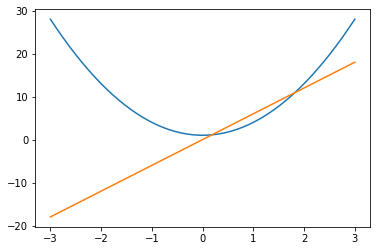

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

y = np.linspace(-3,3)
plt.plot(y,(f(y)))
plt.plot(y, derivative(f,y))

## Integration
For beginners, we do integration in order to apporximate the area under a function of a curve. A mathematical way of approximating the area under the curve is by utilizing Riemann sums. This is done by thinking of an $n$ number of rectangles under the curve. For the purposes of simplicity, we consider only the left endpoints of rectangles. Mathematically an integral is approximated as: $$\int_a^b f(x)\,dx \approx \sum_{i=1}^Nf(x_i^*)(x_i-x_{i-1})\ \ , \ x_i^* \in [x_{i-1},x_i]$$ Since we are considering the left endpoint, $x_i^* = x_{i-1}$. More reading can be found [here](https://www.math.ubc.ca/~pwalls/math-python/integration/riemann-sums/).

Using simpy and scipy we try to solve: $$\int_0^5\frac{1}{1+x^2}dx$$


In [36]:
from scipy.integrate import quad

x = sp.Symbol('x')

f = lambda x : 1/(1+x**2)

print(sp.integrate(f(x),x))
print(quad(f,0,5)) # Interval from 0 to 5


atan(x)
(1.3734007669450166, 7.16706990454164e-09)


Given the funtion itegrated above, $f(x)=\frac{1}{1+x^2}$, we visualize the process of Riemann sums where the number of triangles is $n=10$, at the interval $[0,5]$.

Text(0.5, 1.0, 'Left Riemann Sum, N = 10')

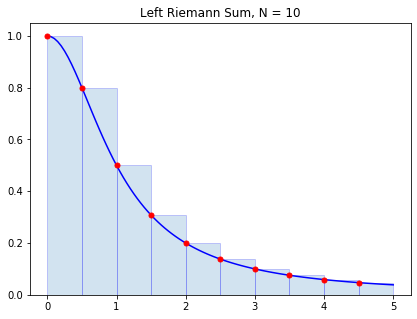

In [28]:
f = lambda x : 1/(1+x**2)
a = 0; b = 5; N = 10
n = 10 # Use n*N+1 points to plot the function smoothly

x = np.linspace(a,b,N+1)
y = f(x)

X = np.linspace(a,b,n*N+1)
Y = f(X)

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(X,Y,'b')
x_left = x[:-1] # Left endpoints
y_left = y[:-1]
plt.plot(x_left,y_left,'r.',markersize=10)
plt.bar(x_left,y_left,width=(b-a)/N,alpha=0.2,align='edge',edgecolor='b')
plt.title('Left Riemann Sum, N = {}'.format(N))